In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
%matplotlib inline
import csv

    
def pltPrintPar():
    plt.rcParams.update({'font.size': 15})
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 8

rootTP="/home/johann/Remote/imac"
rootTPtmp="/home/johann/Remote2"
rootMAC="/Users/jh"
root=rootMAC

In [4]:
def plotdataArr(dataArray,xlabel,lineArr,lineParam='',title='',linestyles='',setlog=''):
    # color stuff: http://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
    pltPrintPar()
    colors=cm.rainbow(np.linspace(0,1,len(dataArray)))
    if linestyles=='': lslist = len(dataArray) * ['o-']
    else: lslist = linestyles
    for i, line in enumerate(dataArray):
        ti = lineParam + ' = ' + str(lineArr[i])
        xs = line[:,0]
        dd0s = line[:,1]/6.
        plt.plot(xs,dd0s,lslist[i],label=ti,c=colors[i])
    plt.xlabel(r'$'+xlabel+'$')
    plt.ylabel(r'$D/D_0$')
    plt.ylim([0,1.3])
    plt.title(title)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
    if setlog=='y' or setlog=="double":
        plt.yscale('log')
    if setlog=='x' or setlog=="double":
        plt.xscale('log')
    plt.show()
    
def plotdataArr(dataArray,xlabel,lineArr,lineParam='',title='',linestyles='',setlog='',legendloc='upper center'):
    # color stuff: http://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
    pltPrintPar()
    colors=cm.rainbow(np.linspace(0,1,len(dataArray)))
    if linestyles=='': lslist = len(dataArray) * ['o-']
    else: lslist = linestyles
    plt.figure(figsize=(7,5))
    for i, line in enumerate(dataArray):
        ti = lineParam + ' = ' + str(lineArr[i])
        xs = line[:,0]
        dd0s = line[:,1]/6.
        plt.plot(xs,dd0s,lslist[i],label=ti,c=colors[i])
    plt.xlabel(r'$'+xlabel+'$')
    plt.ylabel(r'$D/D_0$')
    plt.ylim([0,1.3])
    plt.title(title)
    plt.legend(loc=legendloc, bbox_to_anchor=(1, 1.2),
          ncol=3, fancybox=True, shadow=True)
    if setlog=='y' or setlog=="double":
        plt.yscale('log')
    if setlog=='x' or setlog=="double":
        plt.xscale('log')
    plt.show()
        
        

In [5]:
def getTriggerData(triggerArr,U0=0):
    triggerNameArr = []
    a=0# This if fixed here, for no HI
    datadir= root + "/Documents/workspace-cpp"
    afrac = '%g'%(float(a)/10)
    dataArr=[]
    for trigger in triggerArr:
        if trigger == 'normal':
            typedir='/SingleParticleSimulation/sim_dataOLD/noreset/dt0.0001/t200/d0/b10/'
            MSD=''
        elif trigger == 'ranRod/nrods1':
            typedir='/SingleParticleSimulation/Release/sim_data/noreset/'+trigger+'/dt0.0005/t200/d0/b10'
            MSD='MSD'
        else:
            typedir='/RanbSPS/Release/sim_data/'+trigger+'/dt0.0005/t200'
            MSD='MSD'
        triggerNameArr.append(trigger.replace('/',''))
        folder=datadir + typedir
        data = []
        for pdir in os.listdir(folder):
            file=os.path.join(folder, pdir,'k1.000/u'+str(U0)+'/InstantValues/linear_fit_parameters'+str(MSD)+'.txt')
            if os.path.isfile(file):
                p=file.split('/p')[1].split('/k')[0] # assign value from dir to p
                p='%g'%(float(p)/10)                 # make p value p/b
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(p)+a/10.,float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        dataArr.append(np.array(sorted(data)))
    return dataArr, triggerNameArr
triggerArr = ['normal']
noHIdata, dummy = getTriggerData(triggerArr)

# Evaluate Single Sphere Simulations
## Import data for $D$ over $p$
### First import Stiff Network data
## ranSpheres no HI

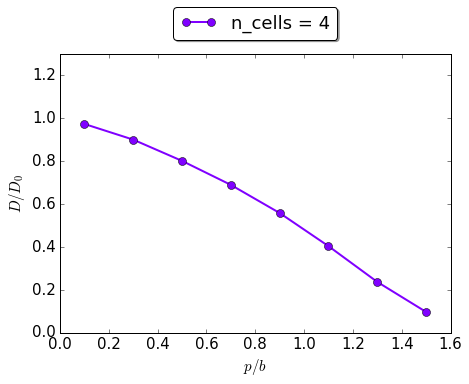

In [7]:
dataArr = []
ns = [4]
datadir= root + "/Documents/workspace-cpp/SPS/Release/sim_data/noreset/ranSpheres/test"
# Here, I can start loop, if I want to obtain numerous lines for different n or something
for n in ns:
    folder= datadir + '/EwaldTest1/n'+str(n)+'/noLub/steric/dt0.0005/t200/a0/d0/b40'
    data = []
    for pdir in os.listdir(folder):
        file=os.path.join(folder, pdir,'k1.000/u0/InstantValues/linear_fit_parametersMSD.txt')
        if os.path.isfile(file):
            p=file.split('/p')[1].split('/k')[0] # assign value from dir to p
            p='%g'%(float(p)/10)                 # make p value p/b
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
    dataArr.append(sorted(data))

RSdata = (np.array(dataArr))
plotdataArr(RSdata,'p/b',lineArr=ns,lineParam='n_cells')

# trueRan no HI RELOAD BETTER DATA FROM SHELDON

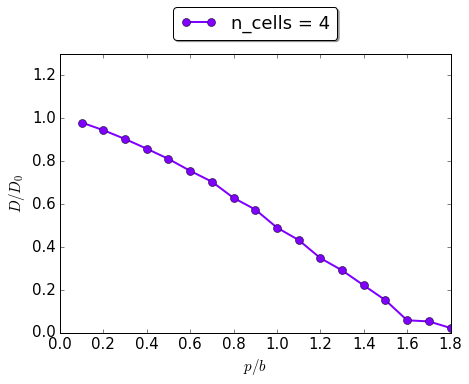

In [8]:
dataArr = []
ns = [4]
datadir= root + "/Documents/workspace-cpp/SPS/Release/sim_data/noreset/trueRan/test"
# Here, I can start loop, if I want to obtain numerous lines for different n or something
for n in ns:
    folder= datadir + '/EwaldTest1/n'+str(n)+'/noLub/steric/dt0.0005/t200/a0/d0/b40'
    data = []
    for pdir in os.listdir(folder):
        file=os.path.join(folder, pdir,'k1.000/u0/InstantValues/linear_fit_parametersMSD.txt')
        if os.path.isfile(file):
            p=file.split('/p')[1].split('/k')[0] # assign value from dir to p
            p='%g'%(float(p)/10)                 # make p value p/b
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
    dataArr.append(sorted(data))

TRdata = (np.array(dataArr))
plotdataArr(TRdata,'p/b',lineArr=ns,lineParam='n_cells')

## SingleSpheres no HI

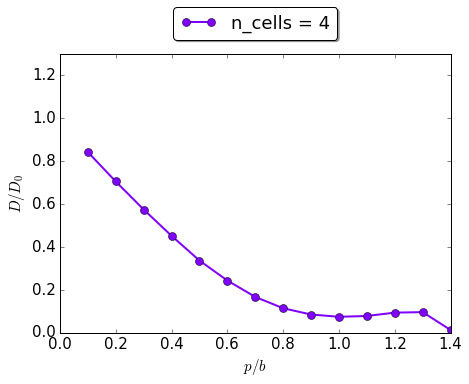

In [9]:
dataArr = []
dummy = [1]

datadir= root + "/Documents/workspace-cpp/SPS/Release/sim_data/noreset/test"
# Here, I can start loop, if I want to obtain numerous lines for different n or something
for d in dummy:
    folder= datadir + '/EwaldTest1/noLub/steric/dt0.0001/t200/a0/d0/b10'
    data = []
    for pdir in os.listdir(folder):
        file=os.path.join(folder, pdir,'k1.000/u0/InstantValues/linear_fit_parametersMSD.txt')
        if os.path.isfile(file):
            p=file.split('/p')[1].split('/k')[0] # assign value from dir to p
            p='%g'%(float(p)/10)                 # make p value p/b
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
    dataArr.append(sorted(data))

SSdata = (np.array(dataArr))
plotdataArr(SSdata,r'p/b',lineArr=ns,lineParam='n_cells')

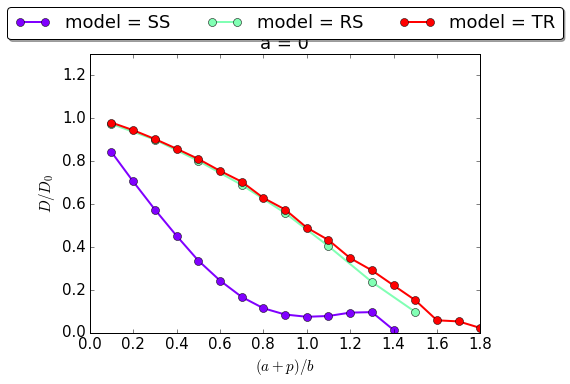

In [10]:
SSandRSdata = [SSdata[0],RSdata[0],TRdata[0]]
plotdataArr(SSandRSdata,r'(a+p)/b',lineArr=['SS','RS','TR'],lineParam='model',title='a = 0')

_______________
_______________
_______________

# Test randomness of sphere distribution
Looks good!

In [357]:
spheredata =  []
posfile = '/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/trueRan/test/EwaldTest1/n7/noLub/steric/dt0.0005/t111/a8/d0/b70/p1/k1.000/u0/Coordinates/single_traj.xyz'
with open(posfile, 'r') as f:
    for i, line in enumerate(f):
        if (i > 5) and line=="344\n":
            break
        spheredata.append(line.split()[1:])
spheredata = (np.asarray(spheredata[3:])).astype(float)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/trueRan/test/EwaldTest1/n7/noLub/steric/dt0.0005/t111/a8/d0/b70/p1/k1.000/u0/Coordinates/single_traj.xyz'

In [ ]:
print(len(spheredata[:].flatten()))
plt.hist(spheredata[:].flatten())
# TYPECAST TO FLOAT!

# FLEXIBLE
## Test different ks

In [37]:
def getData_Fixa(a,ksArr,n,dt,nedge=1):
    dt=str(dt)
    dataArr = []
    b=n*10
    datadir= root + "/Documents/workspace-cpp/Flexible/Release/sim_data/"
    #loop to recursively write plot commands to plot D over U_0  ----------------------------------------
    for i in range(len(ksArr)):
        ks = ksArr[i]
        folder= datadir + 'n_edge'+str(nedge)+'/n_cells'+str(n)+'/dt'+dt+'/t200/kb0/ks' + str(ks) + '/a' + str(a) + '/b' + str(b) 
        data = []
        for pdir in os.listdir(folder):
            file=os.path.join(folder, pdir,'InstantValues/linear_fit_parametersMSD.txt')
            if os.path.isfile(file):
                p=file.split('/p')[1].split('/I')[0] # assign value from dir to p
                p='%g'%(float(p)/10)                 # make p value p/b
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(p)+a/10.,float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
            #print(file)
        dataArr.append(np.array(sorted(data)))
    return dataArr

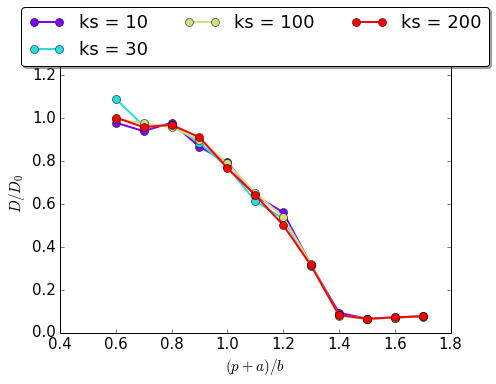

In [44]:
ksArrdt2 = [10,30,100,200]
a=5
n=3
dt=0.0002
Flexksdatdt2 = getData_Fixa(a,ksArrdt2,n,dt)
plotdataArr(Flexksdatdt2,r'(p+a)/b',lineArr=ksArrdt2,lineParam='ks')


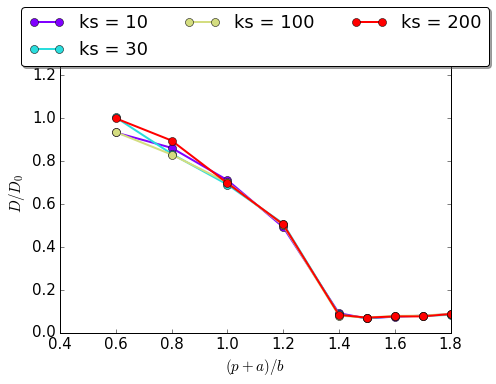

In [40]:
ksArr = [10,30,100,200]
a=5
n=3
dt=0.0001
Flexksdata = getData_Fixa(a,ksArr,n,dt)
plotdataArr(Flexksdata,r'(p+a)/b',lineArr=ksArr,lineParam='ks')


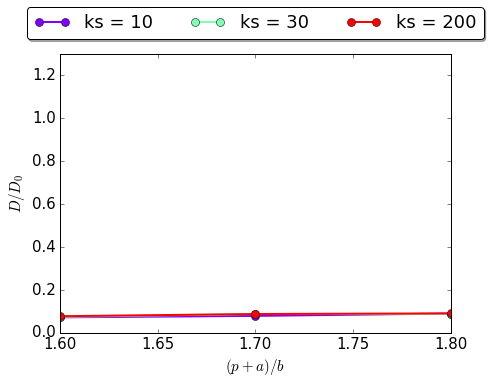

In [41]:
ksArrSmalldt = [10,30,200]
a=5
n=3
dt='5e-05'
FlexksSmalldt = getData_Fixa(a,ksArrSmalldt,n,dt)
plotdataArr(FlexksSmalldt,r'(p+a)/b',lineArr=ksArrSmalldt,lineParam='ks')

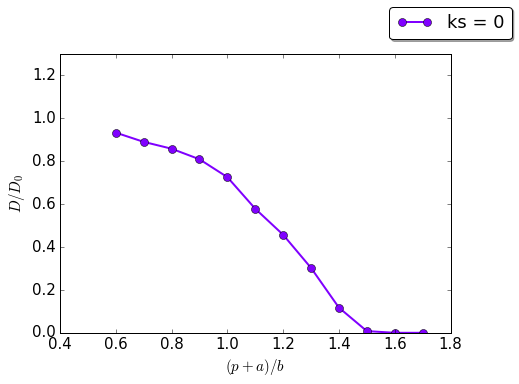

[array([[  6.00000000e-01,   5.59629045e+00],
       [  7.00000000e-01,   5.33817336e+00],
       [  8.00000000e-01,   5.14675503e+00],
       [  9.00000000e-01,   4.85202672e+00],
       [  1.00000000e+00,   4.35212942e+00],
       [  1.10000000e+00,   3.46826125e+00],
       [  1.20000000e+00,   2.74048071e+00],
       [  1.30000000e+00,   1.81348567e+00],
       [  1.40000000e+00,   7.02655144e-01],
       [  1.50000000e+00,   4.75999909e-02],
       [  1.60000000e+00,   9.74443179e-05],
       [  1.70000000e+00,  -7.66916278e-07]])]


In [58]:
ks0Arr = [0]
a=5
n=1
dt=0.0002
Flexks0data = getData_Fixa(a,ks0Arr,n,dt)
plotdataArr(Flexks0data,r'(p+a)/b',lineArr=ks0Arr,lineParam='ks')
print(Flexks0data)

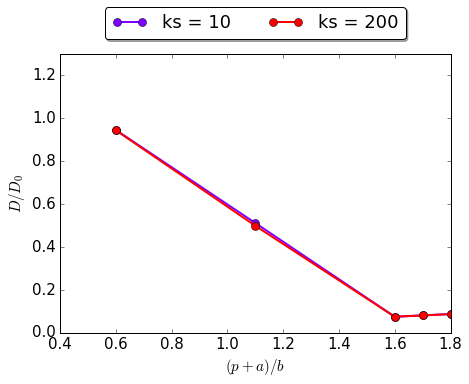

In [46]:
ksArrdt5 = [10,200]
a=5
n=3
dt=0.0005
Flexksdatdt5 = getData_Fixa(a,ksArrdt5,n,dt)
plotdataArr(Flexksdatdt5,r'(p+a)/b',lineArr=ksArrdt5,lineParam='ks')

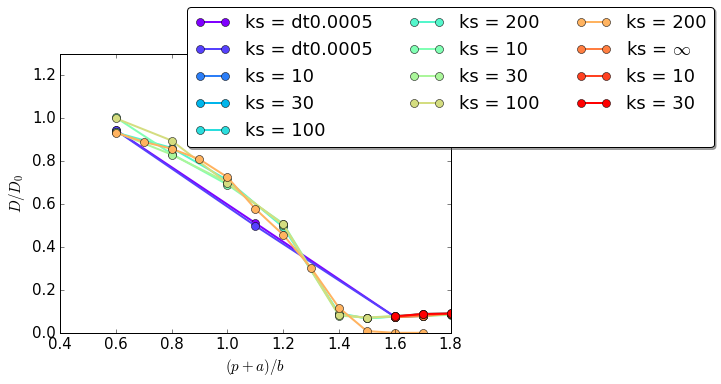

In [49]:
FlexksAndSS = [x for x in Flexksdatdt5] + [x for x in FlexksSmalldt] + [x for x in Flexksdata] + [y for y in Flexks0data] + [y for y in  FlexksSmalldt]
plotdataArr(FlexksAndSS,r'(p+a)/b',lineArr=2*["dt0.0005"] +ksArrdt2+ ksArr+[r'$\infty$']+ksArrSmalldt,lineParam='ks')

In [ ]:
ksArrdt2 = [10,30,200]
a=5
n=6
dt=0.0002
Flexksdatdt2 = getData_Fixa(a,ksArrdt2,n,dt)
plotdataArr(Flexksdatdt2,r'(p+a)/b',lineArr=ksArrdt2,lineParam='ks')
ksArrdt2 = [10,30,200]
a=5
n=6
dt=0.0002
Flexksdatdt2 = getData_Fixa(a,ksArrdt2,n,dt)
plotdataArr(Flexksdatdt2,r'(p+a)/b',lineArr=ksArrdt2,lineParam='ks')


# Plot D over n_cells 
use extra data in /Users/jh/Documents/Remote_PC/yoshi_scratch/Flexible/sim/Release/sim_data/n_edge1

In [4]:
def getDoverncellData(p,a,ksArr,dt,nedge=1):
    dataArr = []
    datadir= root + "/Documents/workspace-cpp/Flexible/Release/sim_data/"
    for ks in ksArr:
        folder= datadir + 'n_edge'+str(nedge)+'/'
        folderAftern = 'dt'+dt+'/t200/kb0/ks'+str(ks)+'/a'+str(a)
        data = []
        for ndir in os.listdir(folder):
            n=ndir.split('n_cells')[1]
            b=10*int(n)
            file=os.path.join(folder, ndir,folderAftern,'b'+str(b)+'/p'+str(p)+'/InstantValues/linear_fit_parametersMSD.txt')
            if os.path.isfile(file):
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([int(n),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
            #print(file)
        dataArr.append(np.array(sorted(data)))
    return dataArr

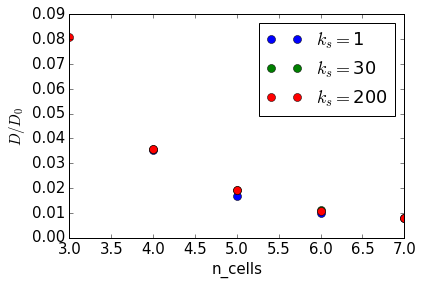

In [89]:
p=12
a=5
ksArr=[1,30,200]
dt='0.0005'
datadt05=getDoverncellData(p,a,ksArr,dt)
for i, data in enumerate(datadt05):
    plt.plot(data[:,0],data[:,1]/6,'o',label='$k_s = $'+str(ksArr[i]))
plt.legend()
plt.xlabel('n_cells')
plt.ylabel('$D/D_0$')
plt.show()

### Conclusion: 
The diffusivity very much depends on the size of the system n_cells.
In fact, it depends much more on n_cells than on the spring constant $k_s$.
The dependency on n_cells decreases for large n_cells. Therefore, it should suffice to run the simulations with a system size of n_cells = 7.

## Evaluate similar test simulations for n_edge =3
#### MORE DATA /Users/jh/Documents/Remote_PC/yoshi_scratch/Flexible/sim/Release/sim_data/n_edge3
In the following I will evaluate test simulations with n_edge = 3 instead of n_edge = 1 (as above), to check if I find similar behavior.

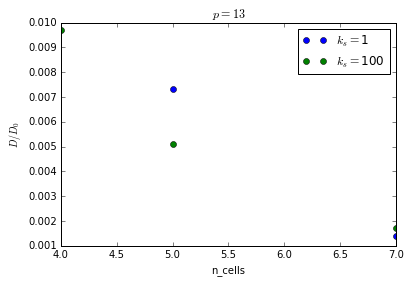

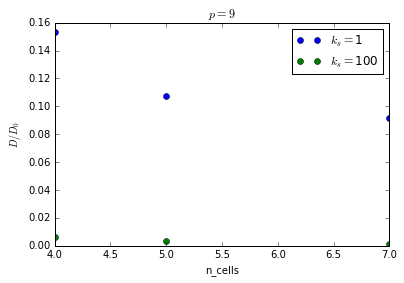

In [6]:
n_edge=3
p=13
a=3
ksArr=[1,100]
dt='0.0005'
datadt05=getDoverncellData(p,a,ksArr,dt,n_edge)
for i, data in enumerate(datadt05):
    plt.plot(data[:,0],data[:,1]/6,'o',label='$k_s = $'+str(ksArr[i]))
plt.legend()
plt.title('$p=13$')
plt.xlabel('n_cells')
plt.ylabel('$D/D_0$')
plt.show()

n_edge=3
p=9
a=3
ksArr=[1,100]
dt='0.0005'
datadt05=getDoverncellData(p,a,ksArr,dt,n_edge)
for i, data in enumerate(datadt05):
    plt.plot(data[:,0],data[:,1]/6,'o',label='$k_s = $'+str(ksArr[i]))
plt.legend()
plt.title('$p=9$')
plt.xlabel('n_cells')
plt.ylabel('$D/D_0$')
plt.show()

### Conclusion:
In contrast to the n_edge=1 case above, there is still quite a large difference in diffusivity between n_cells =5 and n_cells = 7. So maybe n_cells should be even larger to than 7 to obtain correct result that is not too strongly influenced by the system size.
NOTE: The next part (D over p evaluation) actually shows, that n_cells=4 or 5 is enough to obtain qualitatively meaningful results. I only have to take care if I want to look quantitatively at $D/D_0$ for large $p$. Then the system size has to be sufficiently large, i.e. n_cells > 7, such that i get the correct $D/D_0$.

Interestingly, comparing the figures for $p=13$ and $p=9$, it appears that there is a stronger $k_s$ dependency at the smaller particle size $p=9$.
This will be more closely examined in the following.

## D over p 
top to bottom: ncell = 7, 5, 4

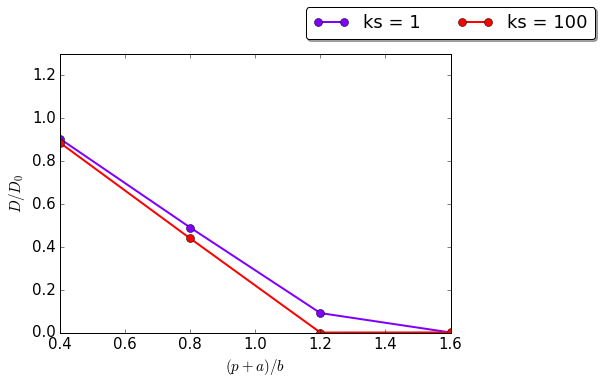

In [14]:
ksArr = [1,100]
a=3
n=7
n_edge=3
dt=0.0005
data = getData_Fixa(a,ksArr,n,dt,n_edge)
plotdataArr(data,r'(p+a)/b',lineArr=ksArr,lineParam='ks')

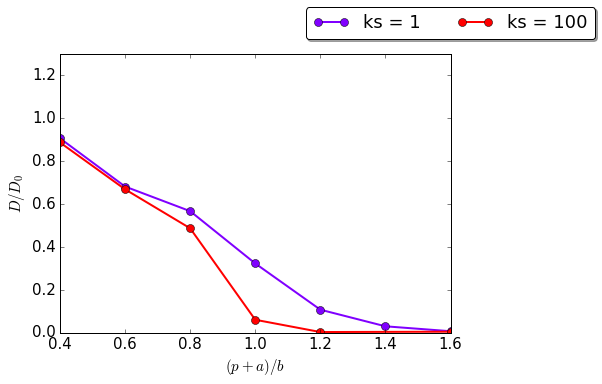

In [22]:
ksArr = [1,100]
a=3
n=5
n_edge=3
dt=0.0005
data = getData_Fixa(a,ksArr,n,dt,n_edge)
plotdataArr(data,r'(p+a)/b',lineArr=ksArr,lineParam='ks')

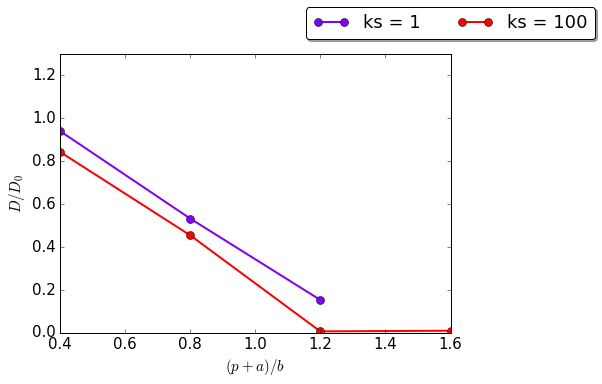

In [11]:
ksArr = [1,100]
a=3
n=4
n_edge=3
dt=0.0005
data = getData_Fixa(a,ksArr,n,dt,n_edge)
plotdataArr(data,r'(p+a)/b',lineArr=ksArr,lineParam='ks')

### Conclusion:
The $k_s$ dependency seems to get very small for large particle diameters $p=13$, i.e. $p+a=16$. For smaller $p$, there is a significant dependency on the spring constant $k_s$.
The behavior for the three different system sizes n_cells=4,5 and 7 looks qualitatively similar.

Hence, it will actually be enough to use n_cells = 5 to obtain meaningful (qualitative) results.


## CONCLUSIONS FOR FURTHER SIMULATIONS:
1. Use a system size of n_cells = 5 for D over p and D over ks data.
2. Make dt small enough! 
  - For a << p, I need to set dt=0.0002
  - Otherwhise it is sufficient to set dt=0.0005
3. Long enough simulation duration for dt=0.0005 and n_edge=3:
  - n=7 : 220h
  - n=5 : 120h
  - n=4 : 80h

### D over (p+a) for different ks
# TODO  NEED TO RELOAD DATA
partly recorded with bad LJ between the polymer Spheres. Need to reload data for ks=1 in yoshi. Especially need to check for differences to the data below!

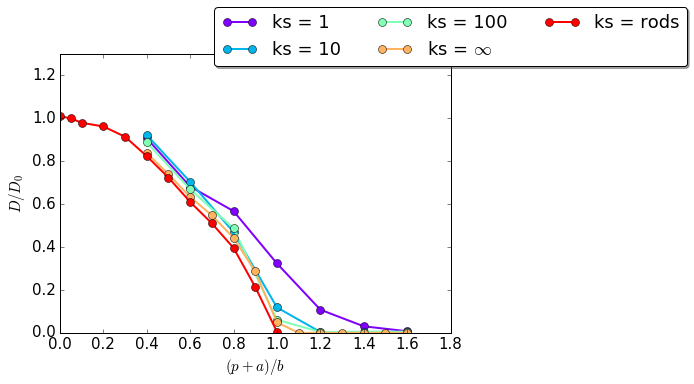

In [44]:
ks0Arr = [0]
a=3
n=1
dt=0.0005
Flexks0data = getData_Fixa(a,ks0Arr,n,dt,3)
# print(Flexks0data)
ksArr = [1,10,100]
a=3
n=5
n_edge=3
dt=0.0005
data = getData_Fixa(a,ksArr,n,dt,n_edge)
plotdataArr(data + Flexks0data+noHIdata, r'(p+a)/b', lineArr=ksArr+['$\infty$','rods'], lineParam='ks')

### Conclusion
We find that for a very flexible lattice with $k_s=1$ (TODO add unit to ks) our model exhibits a kind of stretched exp looking decrease in diffusivity for increasing $p$.
For increasing $k_s$, the shape of the $D$ over $p$ curve approaches the shape of the curve for our old model with rigid cylinders. Only for $(p+a)=b$ there is a small offset, since when spheres are used to model the polymer chains, the tracer can still move between cells.

### TODO
- Mit Roland klären: Wenn ich bei konstantem aop wert die monomer volume fraction erhöhe, dann erhöhe ich auch die dichte an cross-links. Ich habe das Gefühl, dass das physikalisch nicht sinnvoll ist. Cross-links entstehen ja chemisch, und nicht durch erhöhung der polymer concentration. Oder? Damit wäre das modell realistischer anzuwenden, wenn Cpoly, oder $\phi$ konstant sind und dafür andere parameter variiert werden.
- Check, if I get similar results with using a different n_edge. For example n_edge=4 and $a=2$ or n_edge=5 and $a=0.9$.
- Note maybe bullshit, since this is simply a different biol. system: compare the below data to data obtained with $a=0.1b$ instead of $a=0.3b$, as below but with similar parameters $(a+p)$, n_edge, n_cells, etc otherwise. The only difference there is, that for $a=0.1b$ the smaller edge particles are more mobile, and the larger tracer $p$ is less mobile at similar $(a+p)/b$. If the data is sufficiently similar, I can justify using one specific combination, e.g. $a=0.3b$ and testing the model behavior in that manner.

## TODO 
Evaluate data in /Users/jh/Documents/Remote_PC/sheldon_scratch/Flexible/sim/Release/sim_data/n_edge4_TODOEval
Evaluate data in /Users/jh/Documents/Remote_PC/sheldon_scratch/Flexible/sim/Release/sim_data/n_edge5_TODOEval
I accidentally aborted this data, but it can still be useful. 
I restarted the simulations and in the end I will combine the fits of these simulations with the new ones.
The data has been recorded as follows:
- for p=1: nc=4 and and dt=0.0005
- for p=3,5,7,9: nc=5 and dt=0.0002
- for p=11,13,15: nc=4 and dt=0.0001 (smaller ncells, due to small dt)

This data was recorded at specific phi=0.02 and phi=0.05 to be compared to  fig.4 in phillips2000!


ALSO: Evaluate unconnected LJ particle data with $k_s=0$ in and include it in the figure above as an upper bound for the diffusivity.

#### NOTE: Try out the method described in the paper Johannson1993a to obtain D/D0 quicker by fitting D(t)
I highlighted this in the printed version of the paper. I will add a note to mendeley, too.

/Users/jh/Documents/Remote_PC/yoshi_scratch/Flexible/sim/Release/sim_data/n_edge3/n_cells4

Note: This is done with n_cells=4, since n_cells=5 takes too long due to calculating LJ between all the particles

In [5]:
def phi_mon(arel,nedge):
    return (3*nedge-2)* 4./3 * np.pi *(arel/2)**3
print('monomer volume fraction of a=0.3b and nedge=3: phi =',phi_mon(0.3,3))
print('monomer volume fraction of a=0.24b and nedge=3: phi =',phi_mon(0.24,3))
print('monomer volume fraction of a=0.18b and nedge=3: phi =',phi_mon(0.18,3))
print('monomer volume fraction  phi =',phi_mon(0.21,4))
print('monomer volume fraction  phi =',phi_mon(0.19,5))
print('In the Phillips2000 paper fig. 4 shows data with a polymer volume fraction of 0.05 and 0.02')

monomer volume fraction of a=0.3b and nedge=3: phi = 0.09896016858807848
monomer volume fraction of a=0.24b and nedge=3: phi = 0.05066760631709618
monomer volume fraction of a=0.18b and nedge=3: phi = 0.021375396415024953
monomer volume fraction  phi = 0.04849048260815845
monomer volume fraction  phi = 0.046687732023773514
In the Phillips2000 paper fig. 4 shows data with a polymer volume fraction of 0.05 and 0.02


# TODO  23.5.2016
For a comparison to the D over p/a curve by Phillips2000, i can run a simulation with phi = phi_mon(0.21,4) = 0.048.
Here, $0.21 \cdot 1.122 = 0.235$ is quite close to the equilibrium position of 4 spheres along the edge of the cell.

**NOTE** Some of the simulations did not work on sheldon, due to using a too big time-step for very small aop values. I have to use a small a of 2.9, otherwise it will not work. I am re-running some simulations with a smaller timestep, but with also a smaller system (ne=4). This will lead to an error due to the small system size, but it will be more feasable in respect to the simulation time.

In contrast, if I use phi =',phi_mon(0.19,5)=0.047, then the spheres are so close together that the LJ is not zero. *But it will be less than 1kT per spring, so I guess it should be ok maybe*.

#### For now I have to find out why previously the simulations aborted on the cluster. Maybe I need to use a smaller time-step.

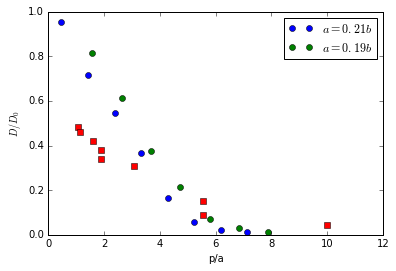

In [42]:
dataArr=[]
aArr=[]
a=2.1
aArr+=[a]
searchdir="/Users/jh/Documents/workspace-cpp/Flexible/Release/sim_data/TODO/n_edge4"
folder=searchdir
data = []
for ncfolder in os.listdir(searchdir):
    if "DS" in ncfolder: continue 
    folder=searchdir+'/'+ncfolder
    b=int(ncfolder[-1:])*10
    for dtfolder in os.listdir(folder):
        if "DS" in dtfolder: continue 
        folder1=folder+'/'+dtfolder+"/t200/kb0/ks1/a"+str(a)+"/b"+str(b)
        for pdir in os.listdir(folder1):
            file=os.path.join(folder1, pdir,'InstantValues/linear_fit_parametersMSD.txt')
            if os.path.isfile(file):
                p=file.split('/p')[1].split('/I')[0] # assign value from dir to p
                p='%g'%(float(p)/10)                 # make p value p/b
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
dataArr.append(np.array(sorted(data)))
a=1.9
aArr+=[a]
searchdir="/Users/jh/Documents/workspace-cpp/Flexible/Release/sim_data/TODO/n_edge5"
folder=searchdir
data = []
for ncfolder in os.listdir(searchdir):
    if "DS" in ncfolder: continue 
    folder=searchdir+'/'+ncfolder
    b=int(ncfolder[-1:])*10
    for dtfolder in os.listdir(folder):
        if "DS" in dtfolder: continue 
        folder1=folder+'/'+dtfolder+"/t200/kb0/ks1/a"+str(a)+"/b"+str(b)
        for pdir in os.listdir(folder1):
            file=os.path.join(folder1, pdir,'InstantValues/linear_fit_parametersMSD.txt')
            if os.path.isfile(file):
                p=file.split('/p')[1].split('/I')[0] # assign value from dir to p
                p='%g'%(float(p)/10)                 # make p value p/b
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(p),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
dataArr.append(np.array(sorted(data)))
for i,data in enumerate(dataArr):
    plt.plot(data[:,0]*10/aArr[i],data[:,1]/6.,'o',label="$a="+"{0:.2f}".format((0.1*aArr[i]))+"b$")
plt.legend()
plt.ylabel("$D/D_0$")
plt.xlabel("p/a")

#### Exp Data ####
with open('/Users/jh/Documents/reports-talk-etc/Data_extraction/data/Phillips2000Fig4phi005.csv', 'r') as csvfile:
    dataExp = list(csv.reader(csvfile))
dataExp=np.asarray(dataExp)
plt.plot(dataExp[:,0],dataExp[:,1],'s')


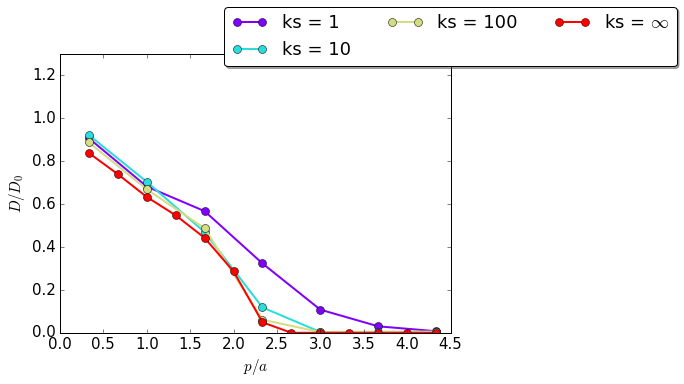

In [45]:
# D over p/a for phi(0.3,3) = 0.1
ks0Arr = [-1]
a=3
n=1
dt=0.0005
Flexks0data = getData_Fixa(a,ks0Arr,n,dt,3)
# print(Flexks0data)
ksArr = [1,10,100]
a=3
arel=a/10.
n=5
n_edge=3
dt=0.0005
data = getData_Fixa(a,ksArr,n,dt,n_edge)
data += Flexks0data
ksArr+=['$\infty$']
for dat in data:
    dat[:,0]=(dat[:,0]-arel)/arel
#print(data)
plotdataArr(data, r'p/a', lineArr=ksArr, lineParam='ks')

In [9]:
# I start with a=3, nedge=3 --> 10/3 = 3.333 = 1.1111 * a
# nc=2? --> 10/(x * 1.1111) = 2 
print('nedge=2:',10/(2.*1.1111))
# nc=4? --> 10/(x * 1.1111) = 4 
print('nedge=4:',10/(4.*1.1111))
print('nedge=5:',10/(5.*1.1111))
nedgeArr=[1,2,3,4,5,6,7]
aArr = [10/(n*1.1111) for n in nedgeArr]
print(aArr)
ksa3=1
ksArr=[ksa3/3*a for a in aArr]
print(ksArr)

nedge=2: 4.5000450004500046
nedge=4: 2.2500225002250023
nedge=5: 1.8000180001800017
[9.000090000900009, 4.5000450004500046, 3.000030000300003, 2.2500225002250023, 1.8000180001800017, 1.5000150001500014, 1.2857271429857158]
[3.000030000300003, 1.5000150001500014, 1.000010000100001, 0.7500075000750007, 0.6000060000600005, 0.5000050000500005, 0.4285757143285719]


___________________
OLDE 
_________________
## Read D over ks data

In [52]:

#loop to recursively write plot commands to plot D over U_0  ----------------------------------------
def getDoverksData(pArr,a,n,dt):
    dataArr = []
    b=n*10
    datadir= root + "/Documents/workspace-cpp/Flexible/Release/sim_data/"
    for p in pArr:
        folder= datadir + 'n_edge1/n_cells'+str(n)+'/dt'+dt+'/t200/kb0/'
        #ks' + str(ks) + '/a' + str(a) + '/b' + str(b) 
        data = []
        for kdir in os.listdir(folder):
            file=os.path.join(folder, kdir,'a'+str(a),'b'+str(b),'p'+str(p),'InstantValues/linear_fit_parametersMSD.txt')
            if os.path.isfile(file):
                ks=file.split('/ks')[1].split('/a')[0] # assign value from dir to ks
                with open(file, 'r') as fitf:
                    m = (fitf.readline().split('m')[1]).split()[0]
                data.append([float(ks),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
            #print(file)
        dataArr.append(np.array(sorted(data)))
    return dataArr

## n_edge = 6 data

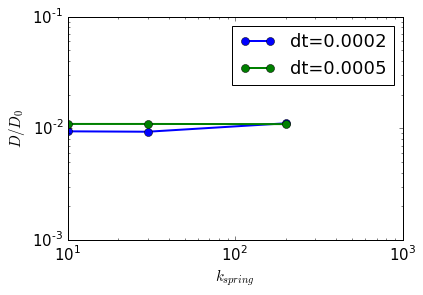

In [56]:
pArr = [12]
a=5; n=6;
dt2="0.0002"
datadt2 = getDoverksData(pArr,a,n,dt2)
dt5="0.0005"
datadt5 = getDoverksData(pArr,a,n,dt5)
plt.loglog(datadt2[0][:,0],datadt2[0][:,1]/6,'o-',label='dt=0.0002')
plt.loglog(datadt5[0][:,0],datadt5[0][:,1]/6,'o-',label='dt=0.0005')
plt.legend()
plt.xlabel(r'$k_{spring}$')
plt.ylabel(r'$D/D_0$')

NameError: name 'Flexpdatan2dt0002' is not defined

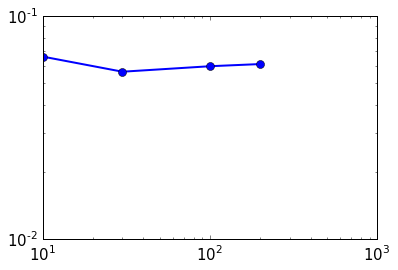

In [31]:
Flexpdatan2dt0001 = Flexpdatan2
plt.loglog(Flexpdatan2[0,:,0],Flexpdatan2[0,:,1]/6,'o-',label='dt=0.0001')
plt.loglog(Flexpdatan2dt0002[0,:,0],Flexpdatan2dt0002[0,:,1]/6,'o-')
plt.legend()
plt.xlabel(r'$k_{spring}$')
plt.ylabel(r'$D/D_0$')

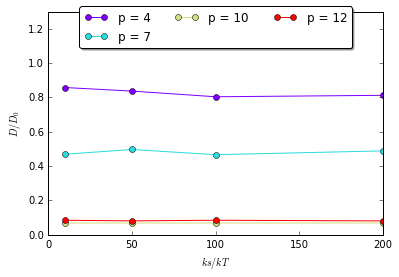

In [322]:
pArr = [4,7,10,12]
dataArr = []
a=5
n=3
b=n*10
datadir= root + "/Documents/workspace-cpp/Flexible/Release/sim_data/"
#loop to recursively write plot commands to plot D over U_0  ----------------------------------------
for p in pArr:
    folder= datadir + 'n_edge1/n_cells'+str(n)+'/dt0.0002/t200/kb0/'
    #ks' + str(ks) + '/a' + str(a) + '/b' + str(b) 
    data = []
    for kdir in os.listdir(folder):
        file=os.path.join(folder, kdir,'a'+str(a),'b'+str(b),'p'+str(p),'InstantValues/linear_fit_parametersMSD.txt')
        if os.path.isfile(file):
            ks=file.split('/ks')[1].split('/a')[0] # assign value from dir to ks
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(ks),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        #print(file)
    dataArr.append(sorted(data))
Flexpdatan3 = np.array(dataArr)
plotdataArr(Flexpdatan3,'ks/kT',lineArr=pArr,lineParam='p')

['o-', 'o-', 'o-', 'o-', 'o--', 'o--', 'o--', 'o--']


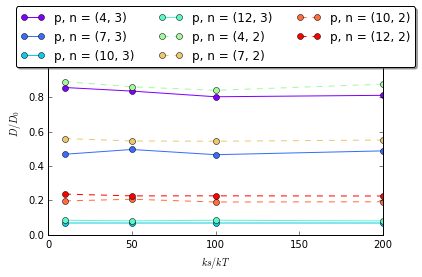

In [323]:
FlexpdataAlln = np.concatenate((Flexpdatan3, Flexpdatan2))
lineArr = [(4,3),(7,3),(10,3),(12,3),(4,2),(7,2),(10,2),(12,2)]
ls = ['o-'] * 4 + ['o--'] * 4
print(ls)
plotdataArr(FlexpdataAlln,'ks/kT',lineArr=lineArr,lineParam='p, n',linestyles=ls)
plt

_______________
_____________
______________
____________
# DEBUGGING



In [335]:
tracerdata = []
ks='200'
p='12'
posfile = '/Users/jh/Documents/workspace-cpp/Flexible/Release/sim_data/n_edge1/n_cells3/dt0.0002/t200/'
posfile += 'kb0/ks'+ks+'/a5/b30/p'+p+'/Coordinates/trajectory.txt'
with open(posfile, 'r') as f:
    for i, line in enumerate(f):
        lines = line.split()
        tracerdata.append(lines)
tracerdata = (np.asarray(tracerdata)).astype(float)

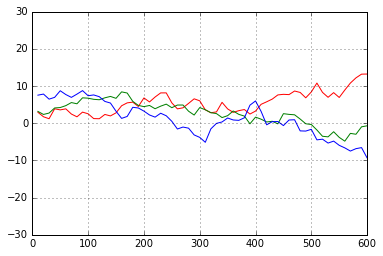

In [340]:
ts = tracerdata[:,0]
xs =  tracerdata[:,1]
ys =  tracerdata[:,2]
zs =  tracerdata[:,3]
plt.plot(ts,xs,'r-',ts,ys,'g-',ts,zs,'b-')
plt.xlim([0,600])
plt.ylim([-30,30])
plt.grid()


In [341]:
posfile = '/Users/jh/Documents/workspace-cpp/Flexible/Release/sim_data/n_edge1/n_cells3/dt0.0002/t200/kb0/ks200/a5/b30/p1/Coordinates/single_traj.xyz'
spheredat = []
with open(posfile, 'r') as f:
    next=0
    for i, lines in enumerate(f):
        line = lines.split()
        if next==1:
            spheredat.append(line[1:])
            next=0
        if line[0]=="O":
            next=1
spheredat = (np.asarray(spheredat)).astype(float)

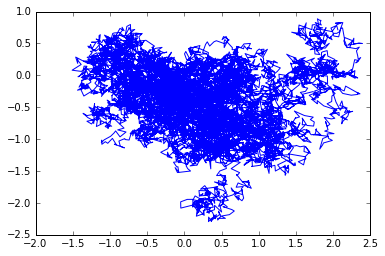

In [342]:
plt.plot(spheredat[:,0],spheredat[:,1])